# Amazon Prime Users

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\deepa\OneDrive\Desktop\Data Analytics\Project\Amazon_Prime\amazon_prime_users.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
df.sample(5)

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
1454,1455,Shane Peterson,deborah39@example.org,deborah39,1945-03-15,Male,North Kristen,2024-02-17,2025-02-16,Monthly,Amex,Auto-renew,Regular,Clothing,Documentary,Tablet,High,4.6,9
1989,1990,Kevin Crawford,vlogan@example.net,vlogan,1980-09-26,Female,Scotttown,2024-01-11,2025-01-10,Monthly,Mastercard,Manual,Regular,Books,Drama,Tablet,Medium,3.7,3
1627,1628,Stephanie Sullivan,alexwade@example.com,alexwade,1990-08-13,Female,Chapmanfort,2024-02-18,2025-02-17,Annual,Visa,Auto-renew,Occasional,Electronics,Documentary,Tablet,Low,4.2,3
1508,1509,Melissa Cruz,ecunningham@example.org,ecunningham,1935-04-03,Male,Lewisview,2024-01-24,2025-01-23,Monthly,Mastercard,Auto-renew,Regular,Books,Romance,Tablet,Medium,3.5,8
2482,2483,Gary White,robert75@example.org,robert75,1965-08-29,Female,Scottville,2024-01-01,2024-12-31,Annual,Mastercard,Auto-renew,Occasional,Clothing,Sci-Fi,Smart TV,Medium,3.8,0


In [5]:
df.columns

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')

In [6]:
df.count()

User ID                          2500
Name                             2500
Email Address                    2500
Username                         2500
Date of Birth                    2500
Gender                           2500
Location                         2500
Membership Start Date            2500
Membership End Date              2500
Subscription Plan                2500
Payment Information              2500
Renewal Status                   2500
Usage Frequency                  2500
Purchase History                 2500
Favorite Genres                  2500
Devices Used                     2500
Engagement Metrics               2500
Feedback/Ratings                 2500
Customer Support Interactions    2500
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [8]:
df.isnull().sum()

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64

In [9]:
print(f"Dataset contains {df.duplicated().sum()} Duplicate values")

Dataset contains 0 Duplicate values


In [10]:
df.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


# 1. Demographic Analysis 

# Age Calculation 

In [11]:
from dateutil.relativedelta import relativedelta
df["Date of Birth"]=pd.to_datetime(df["Date of Birth"])
today=pd.Timestamp("today").normalize()
df["Age (yrs)"]=df['Date of Birth'].apply(lambda dob:relativedelta(today,dob).years)

In [12]:
df=df.reindex(columns=['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth','Age (yrs)',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions','TLD'])

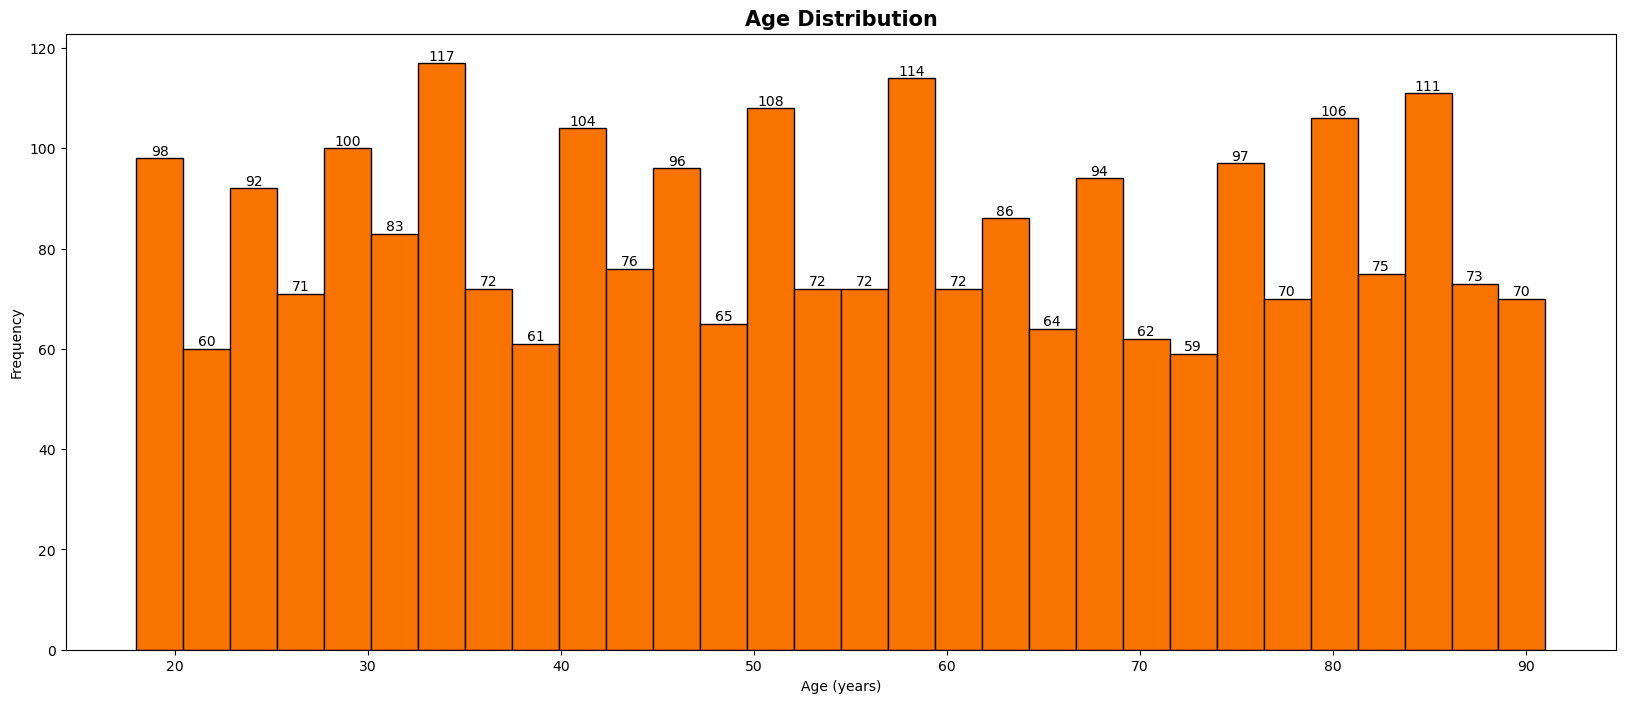

In [13]:
plt.figure(figsize=(20, 8))
counts, bins, bars = plt.hist(df["Age (yrs)"], bins=30, color='#F97300', edgecolor='black')
for count, bar in zip(counts, bars):
    plt.text(bar.get_x() + bar.get_width() / 2, count, int(count), ha='center', va='bottom')

plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution',fontsize=15, fontweight='bold')
plt.show()

# Gender Distribution 

In [14]:
gender_count=df["Gender"].value_counts()

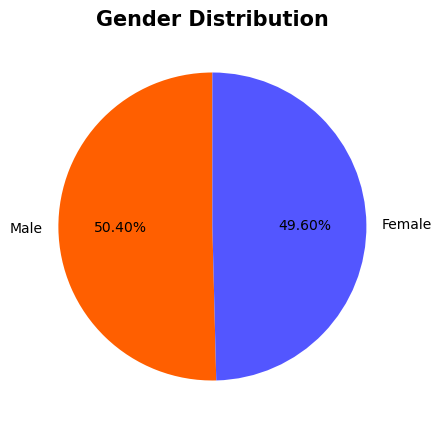

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.2f%%', startangle=90, colors=['#FF5F00', '#5356FF', '#99ff99', '#ffcc99'])
plt.title('Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

# Distribution of Top-Level Domains

In [16]:
tlds=df["Email Address"].str.split(".",expand=True)

df["TLD"]=tlds[1]
df["TLD"]=df["TLD"].replace({"com":"Commericial(.com)","net":"Network(.net)","org":"Organization(.org)"})


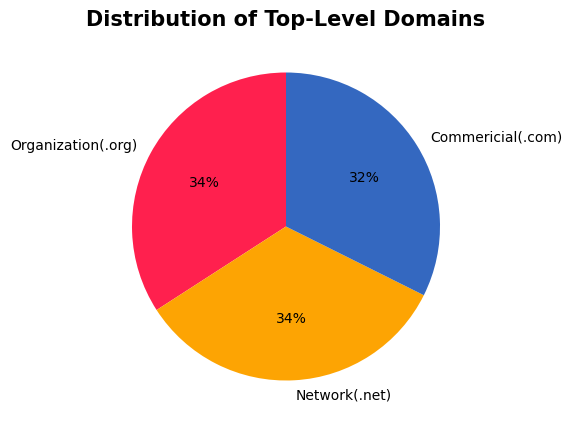

In [17]:
tld_count=df["TLD"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(tld_count, labels=tld_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Distribution of Top-Level Domains', fontsize=15, fontweight='bold')
plt.show()

# 2. Membership and Subscription Analysis

# Subscription Plan 

# Overall Subscription Plan Analysis

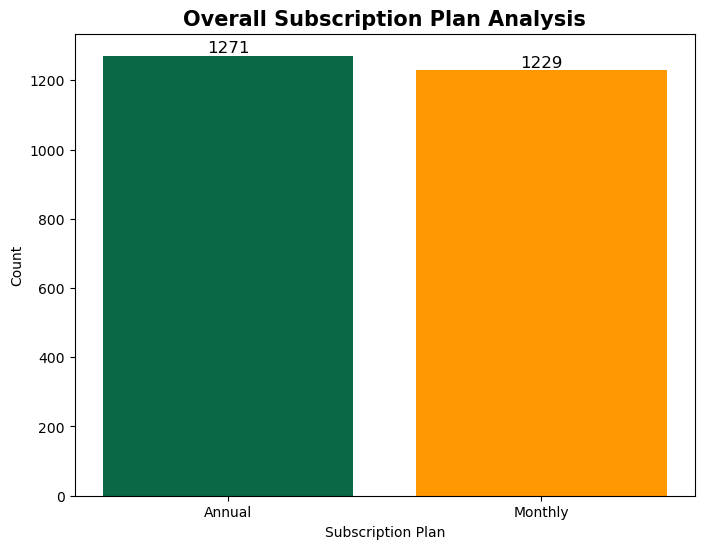

In [18]:
plan_count = df['Subscription Plan'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(plan_count.index, plan_count, color=['#0A6847', '#FF9800', '#99ff99', '#ffcc99'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.title('Overall Subscription Plan Analysis', fontsize=15, fontweight='bold')
plt.show()

# Male Subscription Plan Analysis

In [19]:
men_plan_count=df.loc[df["Gender"]=="Male",'Subscription Plan'].value_counts()

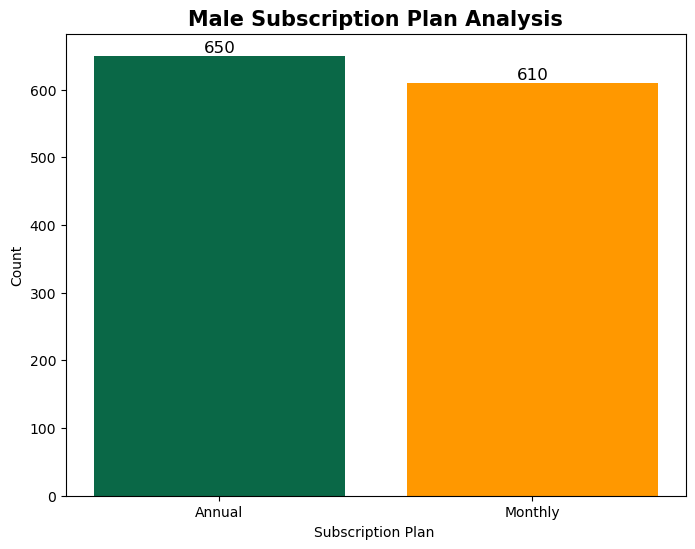

In [20]:
plt.figure(figsize=(8, 6))
bars = plt.bar(men_plan_count.index, men_plan_count, color=['#0A6847', '#FF9800', '#99ff99', '#ffcc99'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Subscription Plan ')
plt.ylabel('Count')
plt.title('Male Subscription Plan Analysis', fontsize=15, fontweight='bold')
plt.show()

# Female Subscription Plan Analysis

In [21]:
women_plan_count=df.loc[df["Gender"]=="Female",'Subscription Plan'].value_counts()

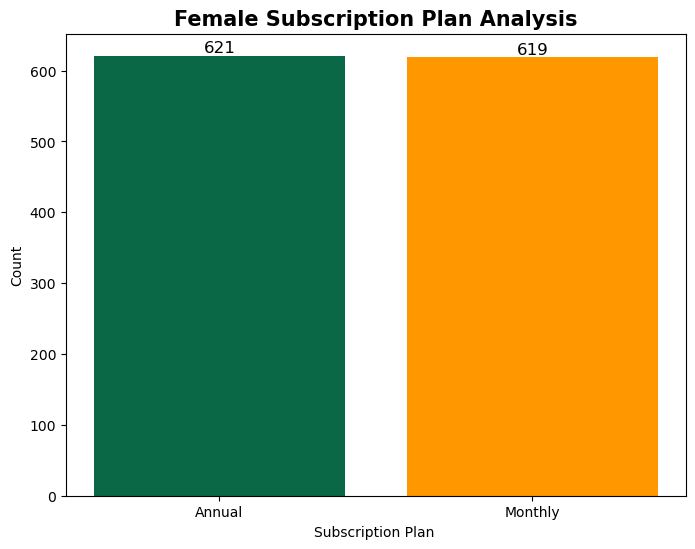

In [22]:
plt.figure(figsize=(8, 6))
bars = plt.bar(women_plan_count.index, women_plan_count, color=['#0A6847', '#FF9800', '#99ff99', '#ffcc99'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Subscription Plan ')
plt.ylabel('Count')
plt.title('Female Subscription Plan Analysis', fontsize=15, fontweight='bold')
plt.show()

# Subscription Start Day 

In [23]:
columns=['Membership Start Date','Membership End Date']
for column in columns:
    df[column]=pd.to_datetime(df[column])

In [24]:
df['Membership Start Day']=df['Membership Start Date'].dt.day_name()
days_count=df["Membership Start Day"].value_counts()

# Overall Subscription Start Day Analysis 

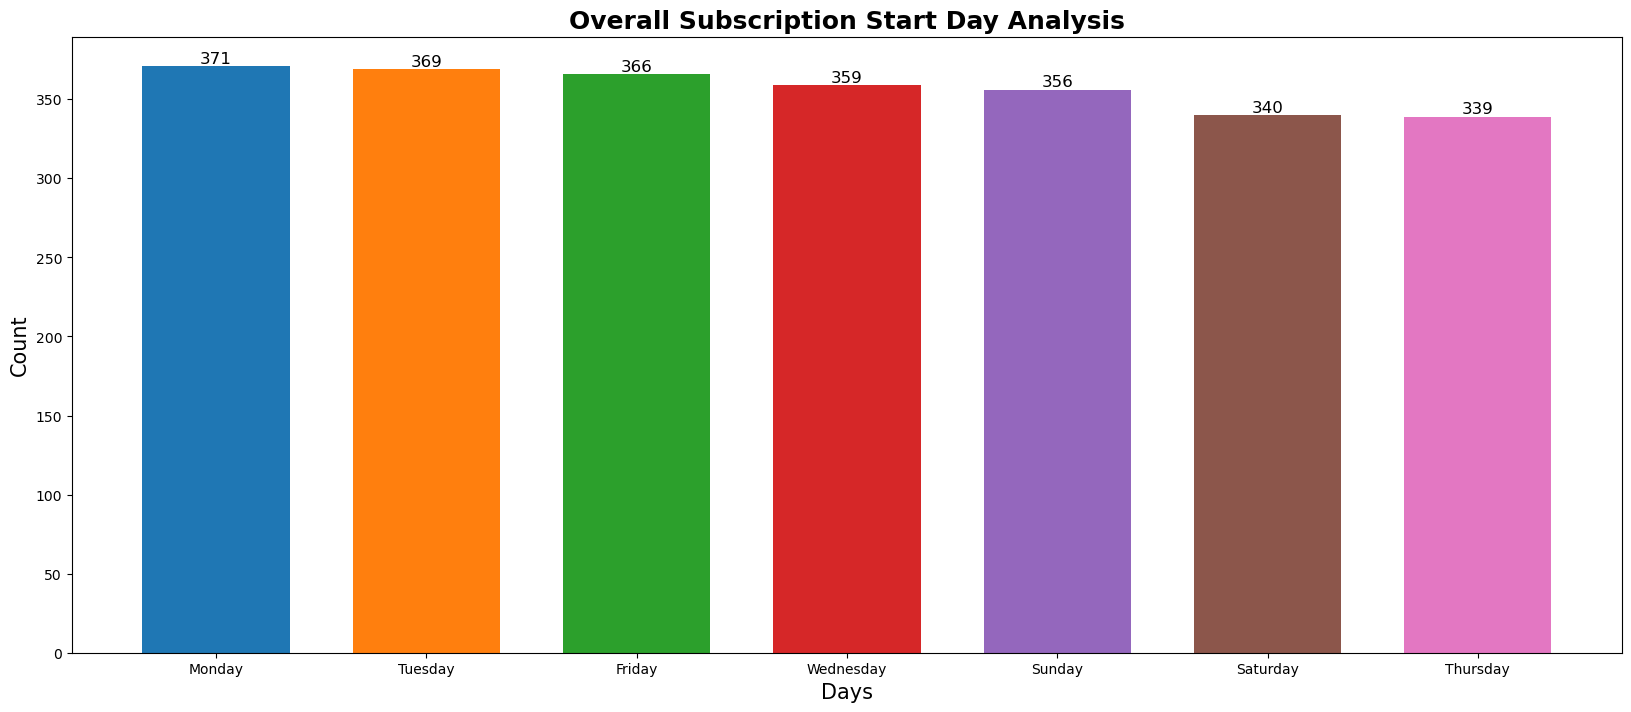

In [25]:
plt.figure(figsize=(20, 8))
bars = plt.bar(days_count.index, days_count, width=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Days',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Overall Subscription Start Day Analysis', fontsize=18, fontweight='bold')
plt.show()

# Male Subscription Start Day Analysis

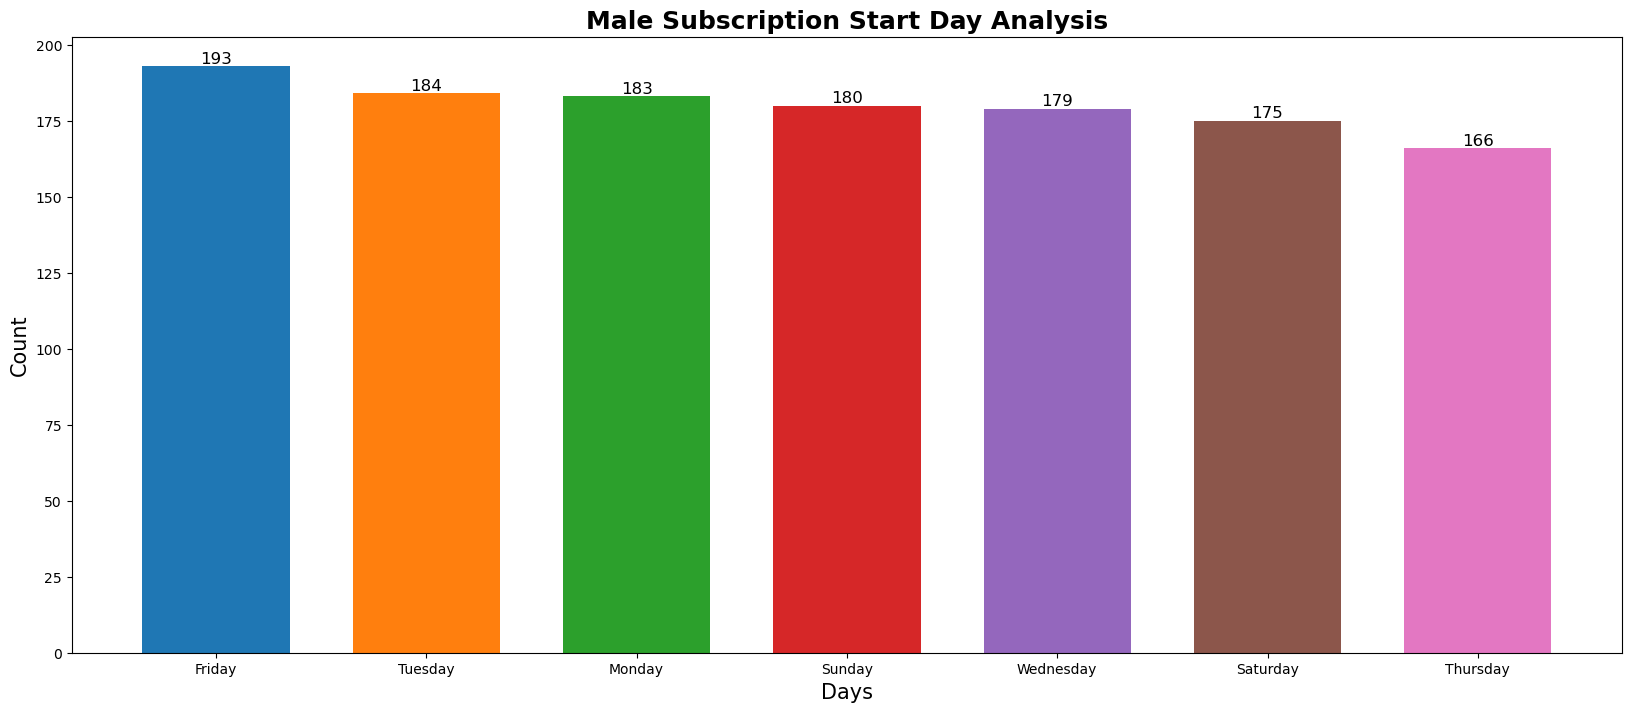

In [26]:
mens_days_count=df.loc[df["Gender"]=="Male","Membership Start Day"].value_counts()
plt.figure(figsize=(20, 8))
bars = plt.bar(mens_days_count.index, mens_days_count, width=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Days',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Male Subscription Start Day Analysis', fontsize=18, fontweight='bold')
plt.show()

# Female Subscription Start Day Analysis

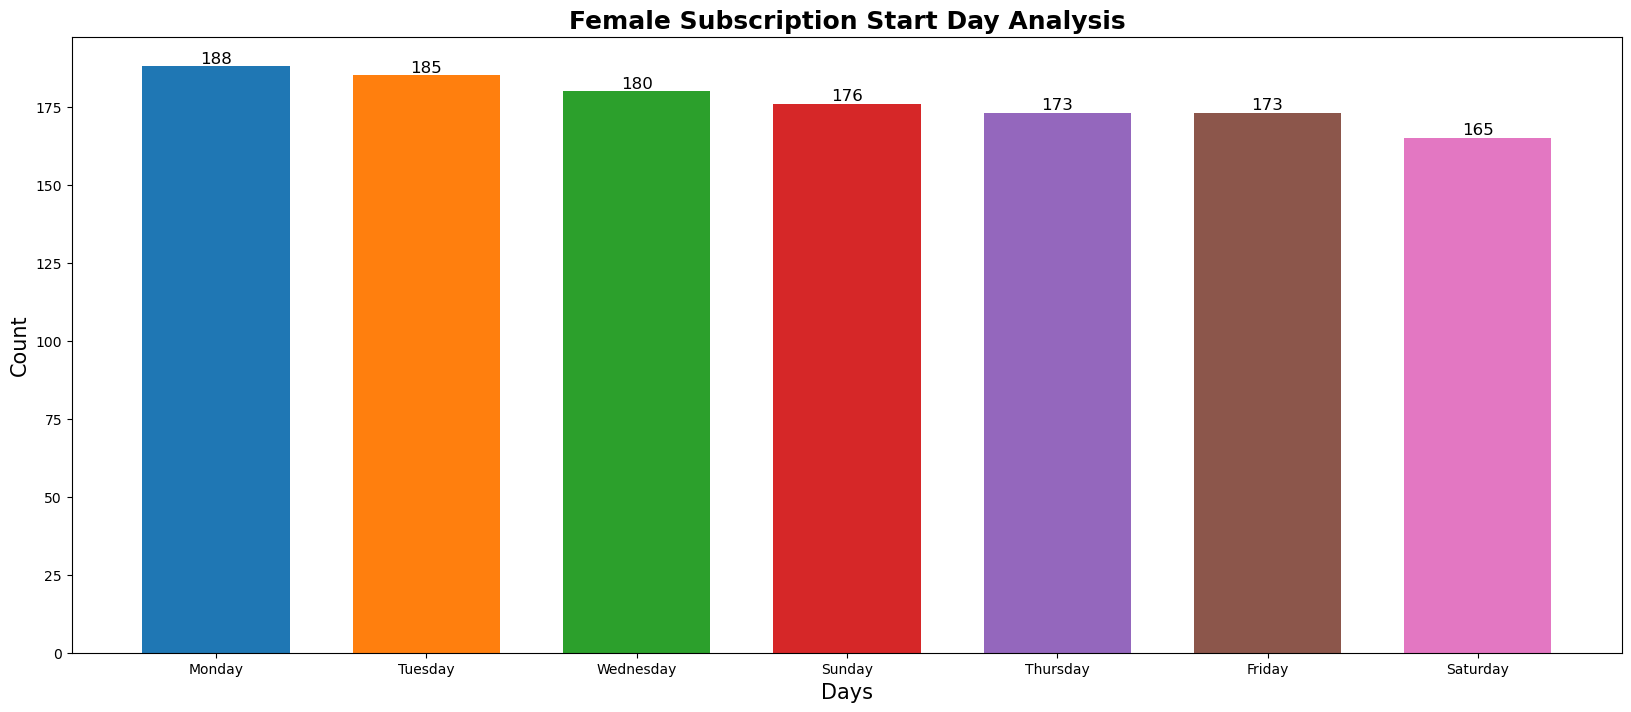

In [27]:
womens_days_count=df.loc[df["Gender"]=="Female","Membership Start Day"].value_counts()
plt.figure(figsize=(20, 8))
bars = plt.bar(womens_days_count.index, womens_days_count, width=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Days',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Female Subscription Start Day Analysis', fontsize=18, fontweight='bold')
plt.show()

# Membership Duration 

In [28]:
df=df.reindex(columns=['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Age (yrs)', 'Gender', 'Location', 'Membership Start Date',
       'Membership End Date', 'Subscription Plan','Membership Duration', 'Payment Information',
       'Renewal Status', 'Usage Frequency', 'Purchase History',
       'Favorite Genres', 'Devices Used', 'Engagement Metrics',
       'Feedback/Ratings', 'Customer Support Interactions','TLD'
       ])

In [29]:
df["Membership Duration"]=df['Membership End Date']-df['Membership Start Date']
duration_count=df['Membership Duration'].value_counts()

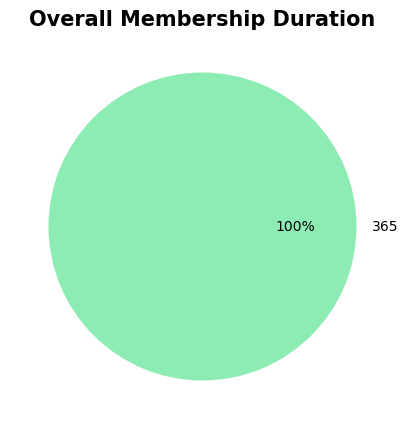

In [30]:
plt.figure(figsize=(5, 5))
plt.pie(duration_count, labels=duration_count.index.days, autopct='%1.0f%%', startangle=180, colors=['#8DECB4', '#5356FF', '#99ff99', '#ffcc99'])
plt.title('Overall Membership Duration', fontsize=15, fontweight='bold')
plt.show()

# Churn Analysis & Prediction

In [31]:
df["Churn Prediction"]="May Not"

In [32]:
cond_1=df["Usage Frequency"]=="Occasional"
cond_2=df["Engagement Metrics"]=='Low'
cond_3=df["Feedback/Ratings"]<3.6

# Churn Prediction for Ratings-3.5

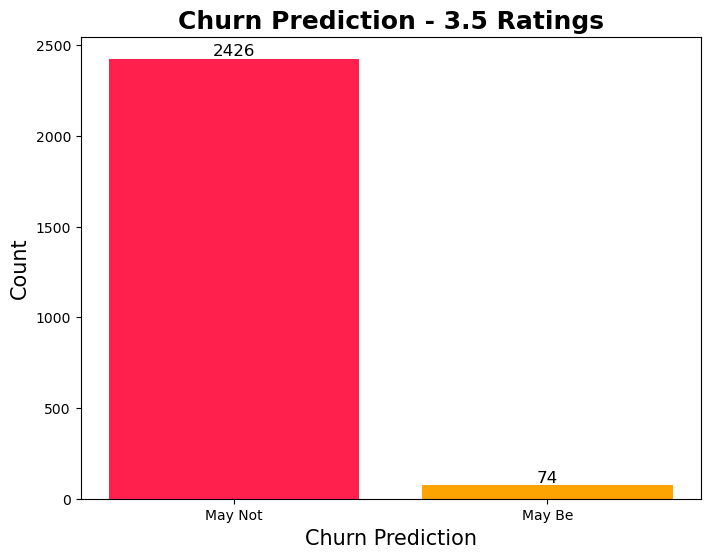

In [33]:
df.loc[(cond_1)&(cond_2)&(cond_3),"Churn Prediction"]="May Be"

churn_count=df["Churn Prediction"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_count.index, churn_count, color=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Churn Prediction', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Churn Prediction - 3.5 Ratings', fontsize=18, fontweight='bold')
plt.show()

# Churn Prediction-3.5 Ratings with Manual Renewal

In [34]:
df["Churn Prediction"]="May Not"

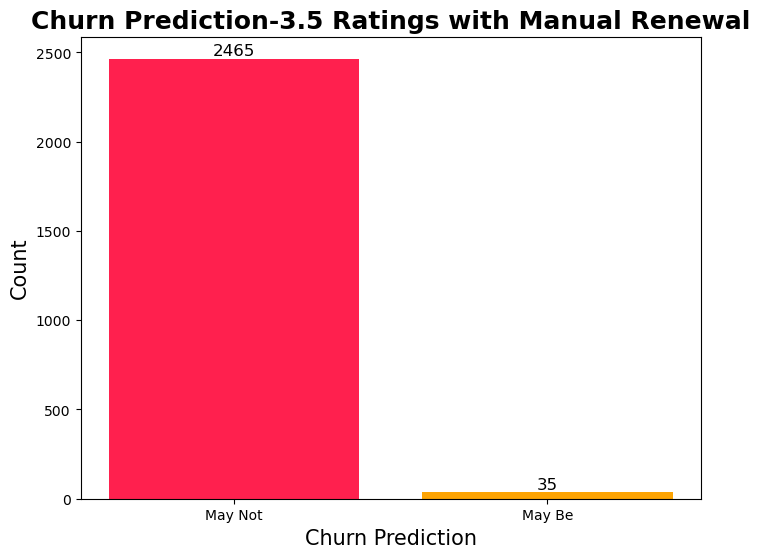

In [35]:
df.loc[(cond_1)&(cond_2)&(cond_3)&(df["Renewal Status"]=="Manual"),"Churn Prediction"]="May Be"

churn_count_m=df["Churn Prediction"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_count_m.index, churn_count_m, color=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Churn Prediction', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Churn Prediction-3.5 Ratings with Manual Renewal', fontsize=18, fontweight='bold')
plt.show()

# Churn Prediction-3.5 Ratings with Auto Renewal

In [36]:
df["Churn Prediction"]="May Not"

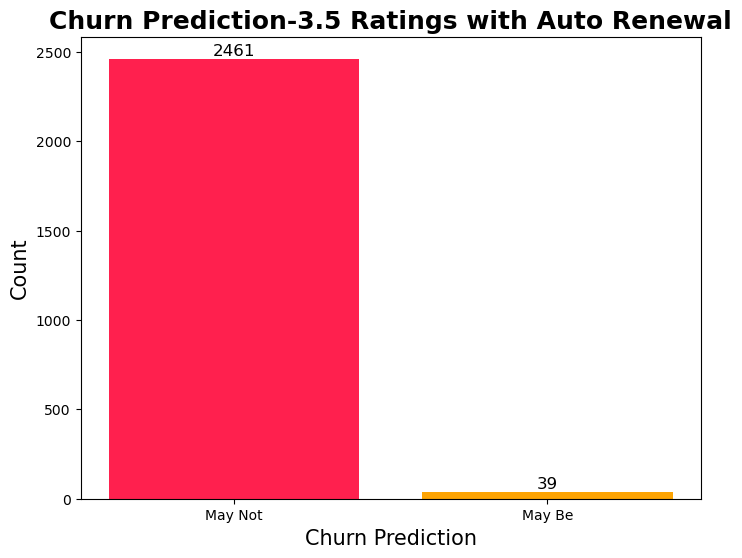

In [37]:
df.loc[(cond_1)&(cond_2)&(cond_3)&(df["Renewal Status"]=="Auto-renew"),"Churn Prediction"]="May Be"

churn_count_a=df["Churn Prediction"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_count_a.index, churn_count_a, color=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Churn Prediction', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Churn Prediction-3.5 Ratings with Auto Renewal', fontsize=18, fontweight='bold')
plt.show()

In [38]:
df.drop(columns="Churn Prediction",inplace=True)

# 3. Payment Analysis 

# Payment Patterns

In [39]:
df["Payment Information"].value_counts()

Payment Information
Mastercard    856
Visa          838
Amex          806
Name: count, dtype: int64

# Overall Payment Pattern 

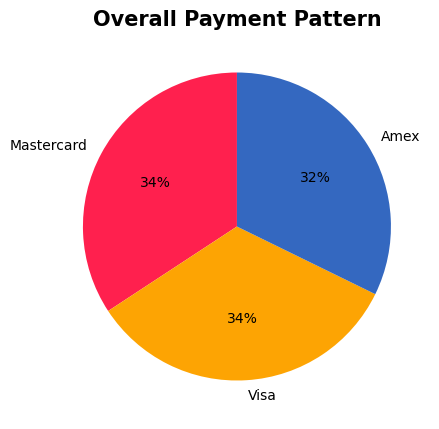

In [40]:
pay_count=df["Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(pay_count, labels=pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Overall Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# Male Overall Payment Pattern 

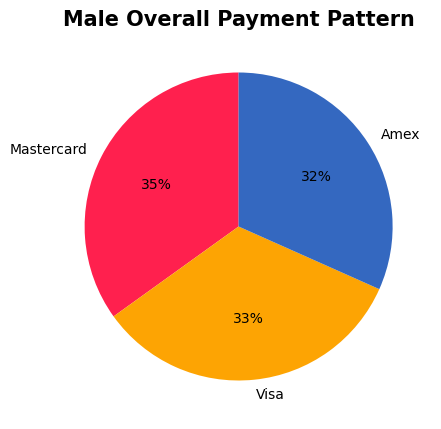

In [41]:
male_pay_count=df.loc[df["Gender"]=="Male","Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_pay_count, labels=male_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Male Overall Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# Female Overall Payment Pattern

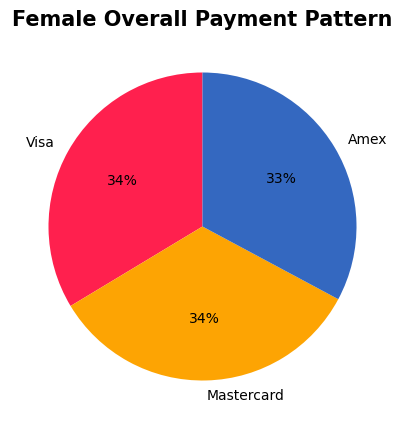

In [42]:
female_pay_count=df.loc[df["Gender"]=="Female","Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_pay_count, labels=female_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Female Overall Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# Annual Subscribers Payment Pattern

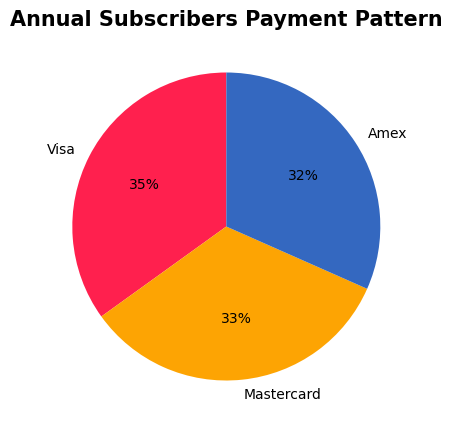

In [43]:
annual_pay_count=df.loc[(df["Subscription Plan"]=="Annual"),"Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(annual_pay_count, labels=annual_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Annual Subscribers Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# Annual Male Subscribers Payment Pattern 

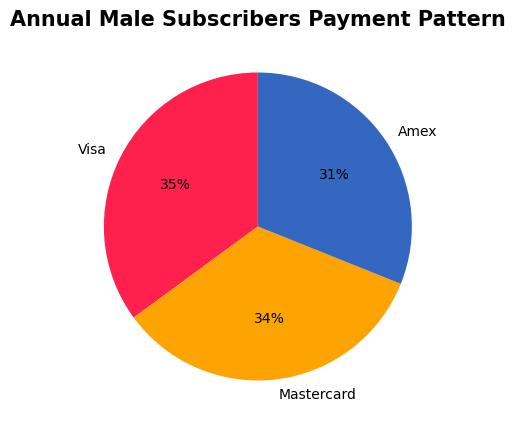

In [44]:
male_annual_pay_count=df.loc[(df["Subscription Plan"]=="Annual")&(df["Gender"]=="Male"),"Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_annual_pay_count, labels=male_annual_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Annual Male Subscribers Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# Annual Female Subscribers Payment Pattern 

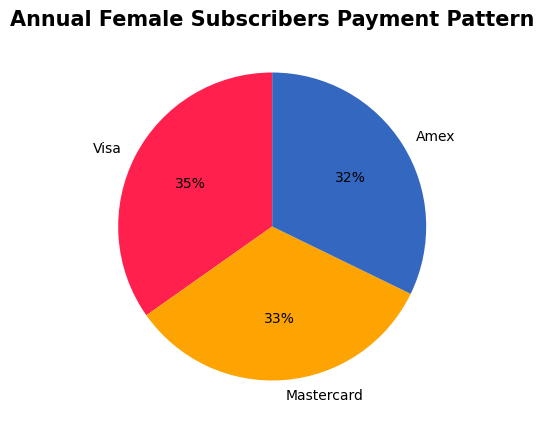

In [45]:
female_annual_pay_count=df.loc[(df["Subscription Plan"]=="Annual")&(df["Gender"]=="Female"),"Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_annual_pay_count, labels=female_annual_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Annual Female Subscribers Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# Monthly Subscribers Payment Pattern

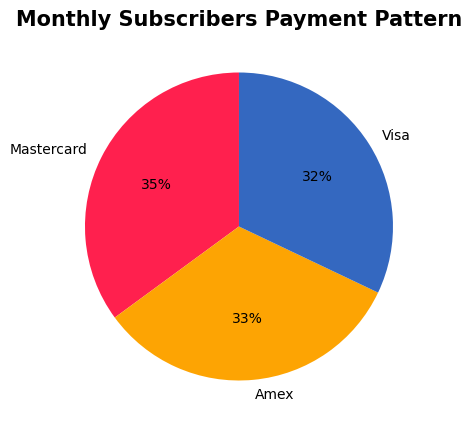

In [46]:
monthly_pay_count=df.loc[(df["Subscription Plan"]=="Monthly"),"Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(monthly_pay_count, labels=monthly_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Monthly Subscribers Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

#  Monthly Male Subscribers Payment Pattern  

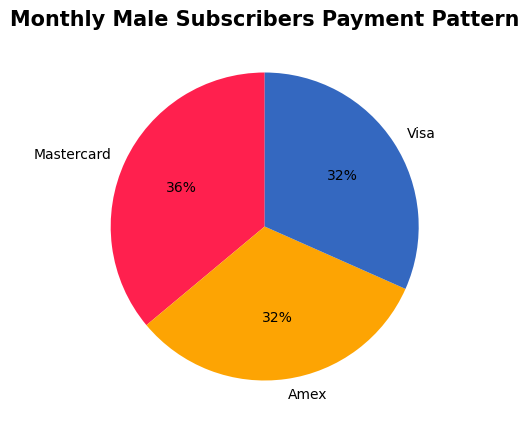

In [47]:
male_monthly_pay_count=df.loc[(df["Subscription Plan"]=="Monthly")&(df["Gender"]=="Male"),"Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_monthly_pay_count, labels=male_monthly_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Monthly Male Subscribers Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

#   Monthly Female Subscribers Payment Pattern   

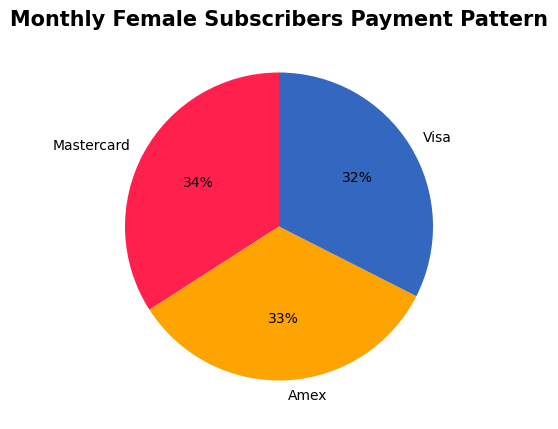

In [48]:
female_monthly_pay_count=df.loc[(df["Subscription Plan"]=="Monthly")&(df["Gender"]=="Female"),"Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_monthly_pay_count, labels=female_monthly_pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Monthly Female Subscribers Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

# 4. User Activity and Engagement

# Usage Patterns 

In [49]:
df["Usage Frequency"].value_counts()

Usage Frequency
Frequent      851
Regular       827
Occasional    822
Name: count, dtype: int64

# Overall Usage Type 

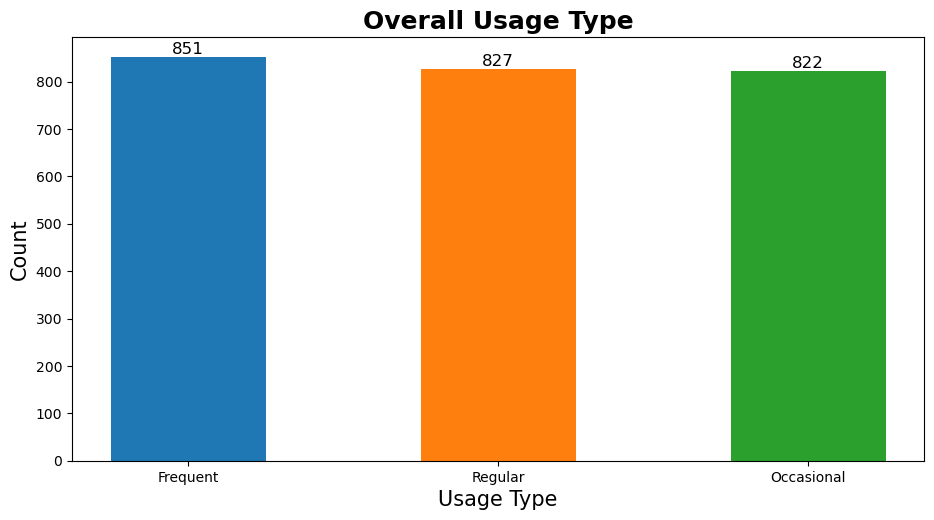

In [50]:
usage_count=df["Usage Frequency"].value_counts()
plt.figure(figsize=(11, 5.5))
bars = plt.bar(usage_count.index, usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Usage Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Overall Usage Type', fontsize=18, fontweight='bold')
plt.show()

# Male Usage Count 

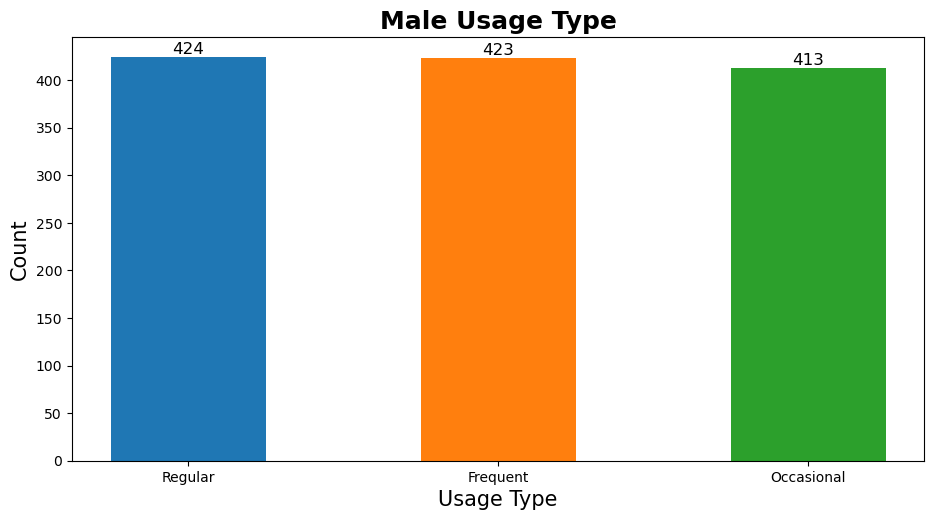

In [51]:
male_usage_count=df.loc[df["Gender"]=="Male","Usage Frequency"].value_counts()
plt.figure(figsize=(11, 5.5))
bars = plt.bar(male_usage_count.index, male_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Usage Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Male Usage Type', fontsize=18, fontweight='bold')
plt.show()

# Female Usage Count  

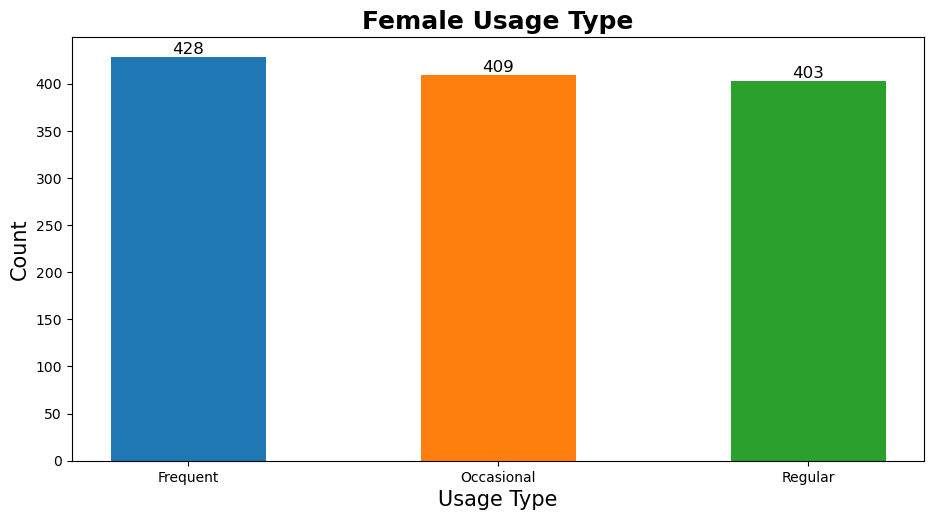

In [52]:
female_usage_count=df.loc[df["Gender"]=="Female","Usage Frequency"].value_counts()
plt.figure(figsize=(11, 5.5))
bars = plt.bar(female_usage_count.index, female_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Usage Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Female Usage Type', fontsize=18, fontweight='bold')
plt.show()

# Device Analysis

# Overall Device Analysis 

In [53]:
df["Devices Used"].value_counts()

Devices Used
Smartphone    867
Tablet        853
Smart TV      780
Name: count, dtype: int64

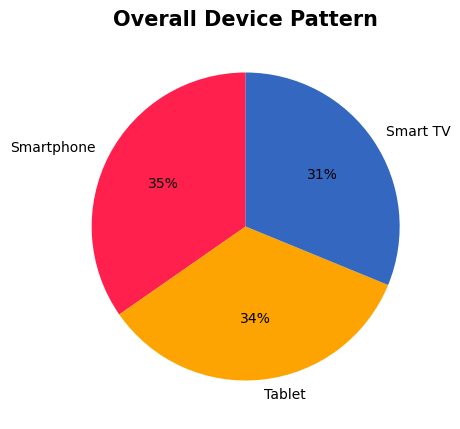

In [54]:
device_count=df["Devices Used"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(device_count, labels=device_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Overall Device Pattern', fontsize=15, fontweight='bold')
plt.show()

# Male Device Pattern 

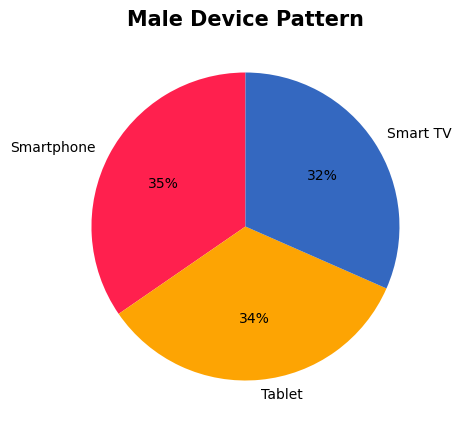

In [55]:
male_device_count=df.loc[df["Gender"]=="Male","Devices Used"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_device_count, labels=male_device_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Male Device Pattern', fontsize=15, fontweight='bold')
plt.show()

# Female Device Pattern 

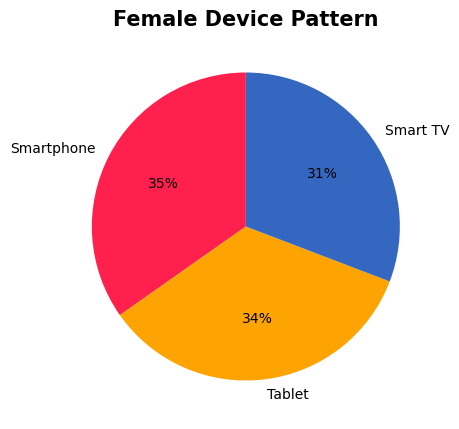

In [56]:
female_device_count=df.loc[df["Gender"]=="Female","Devices Used"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_device_count, labels=female_device_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Female Device Pattern', fontsize=15, fontweight='bold')
plt.show()

# Engagement Metrics

In [57]:
df["Engagement Metrics"].value_counts()

Engagement Metrics
High      845
Medium    834
Low       821
Name: count, dtype: int64

# Overall Engagement

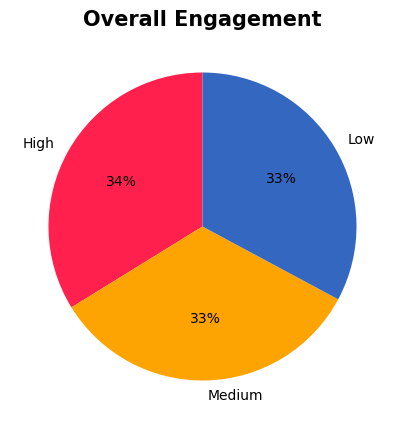

In [58]:
engagement_count=df["Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(engagement_count, labels=engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Overall Engagement', fontsize=15, fontweight='bold')
plt.show()

# Male Engagement

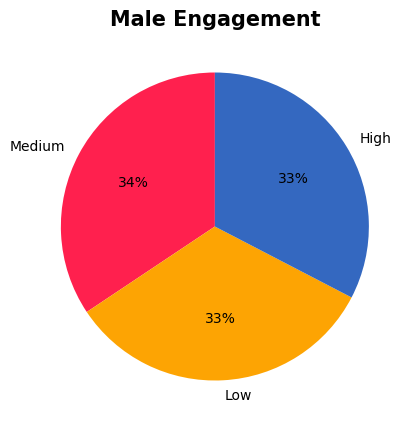

In [59]:
male_engagement_count=df.loc[df["Gender"]=="Male","Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_engagement_count, labels=male_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Male Engagement', fontsize=15, fontweight='bold')
plt.show()

# Female Engagement

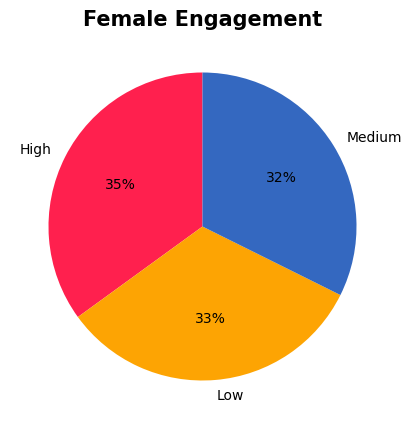

In [60]:
female_engagement_count = df.loc[df["Gender"] == "Female", "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_engagement_count, labels=female_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Female Engagement', fontsize=15, fontweight='bold')
plt.show()

# Annual Engagement

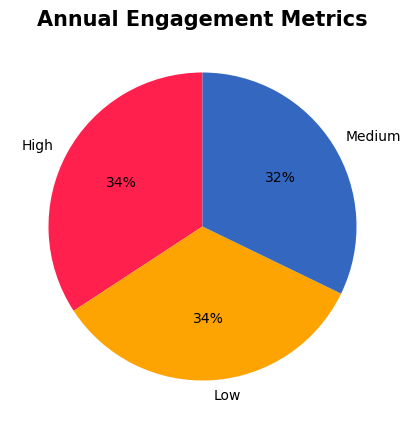

In [61]:
annual_engagement_count = df.loc[df["Subscription Plan"] == "Annual", "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(annual_engagement_count, labels=annual_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Annual Engagement Metrics', fontsize=15, fontweight='bold')
plt.show()


# Annual Male Engagement

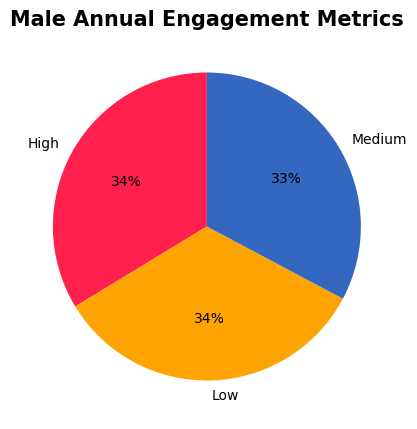

In [62]:
male_annual_engagement_count = df.loc[(df["Subscription Plan"] == "Annual") & (df["Gender"] == "Male"), "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_annual_engagement_count, labels=male_annual_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Male Annual Engagement Metrics', fontsize=15, fontweight='bold')
plt.show()


# Annual Female Engagement

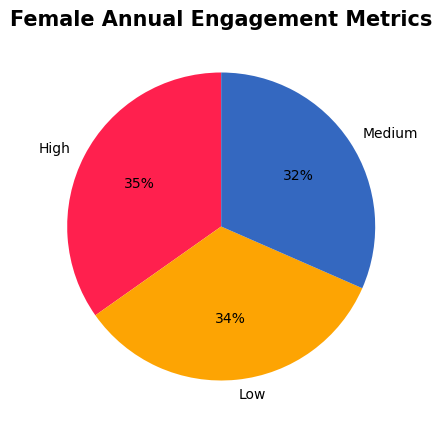

In [63]:
female_annual_engagement_count = df.loc[(df["Subscription Plan"] == "Annual") & (df["Gender"] == "Female"), "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_annual_engagement_count, labels=female_annual_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Female Annual Engagement Metrics', fontsize=15, fontweight='bold')
plt.show()


# Monthly Engagement

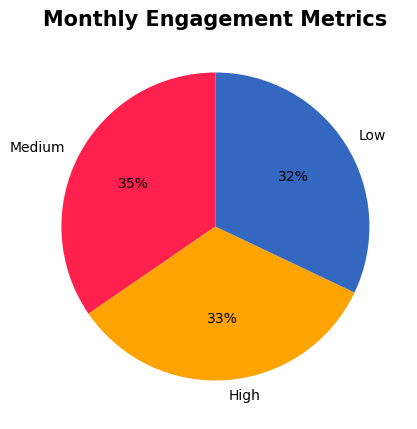

In [64]:
monthly_engagement_count = df.loc[df["Subscription Plan"] == "Monthly", "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(monthly_engagement_count, labels=monthly_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Monthly Engagement Metrics', fontsize=15, fontweight='bold')
plt.show()

# Monthly Male Engagement

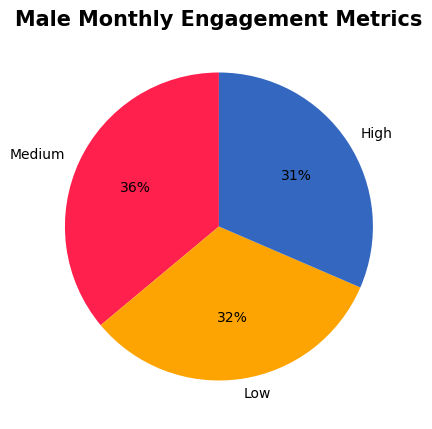

In [65]:
male_monthly_engagement_count = df.loc[(df["Subscription Plan"] == "Monthly") & (df["Gender"] == "Male"), "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(male_monthly_engagement_count, labels=male_monthly_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Male Monthly Engagement Metrics', fontsize=15, fontweight='bold')
plt.show()

# Monthly Female Engagement

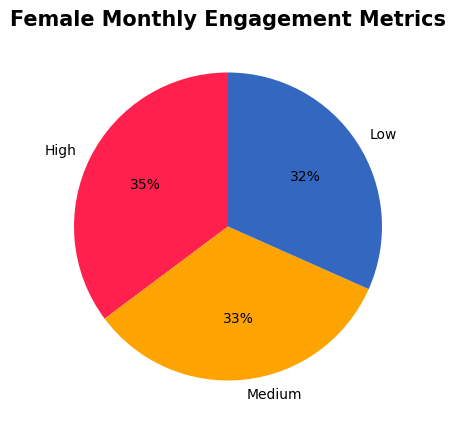

In [66]:
female_monthly_engagement_count = df.loc[(df["Subscription Plan"] == "Monthly") & (df["Gender"] == "Female"), "Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(female_monthly_engagement_count, labels=female_monthly_engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Female Monthly Engagement Metrics', fontsize=15, fontweight='bold')
plt.show()

# 5. Content Preferences

# Genre Popularity

In [67]:
df["Favorite Genres"].value_counts()

Favorite Genres
Horror         383
Action         380
Romance        368
Drama          361
Comedy         349
Documentary    340
Sci-Fi         319
Name: count, dtype: int64

# Overall Genre Analysis

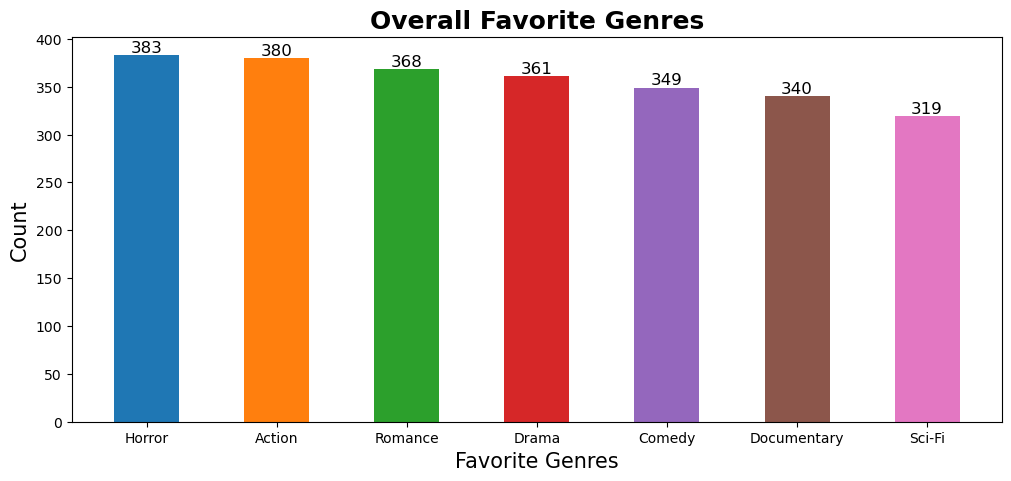

In [68]:
genre_count = df["Favorite Genres"].value_counts()
plt.figure(figsize=(12, 5))
bars = plt.bar(genre_count.index, genre_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Overall Favorite Genres', fontsize=18, fontweight='bold')
plt.show()

# Male Subscribers Genre Analysis

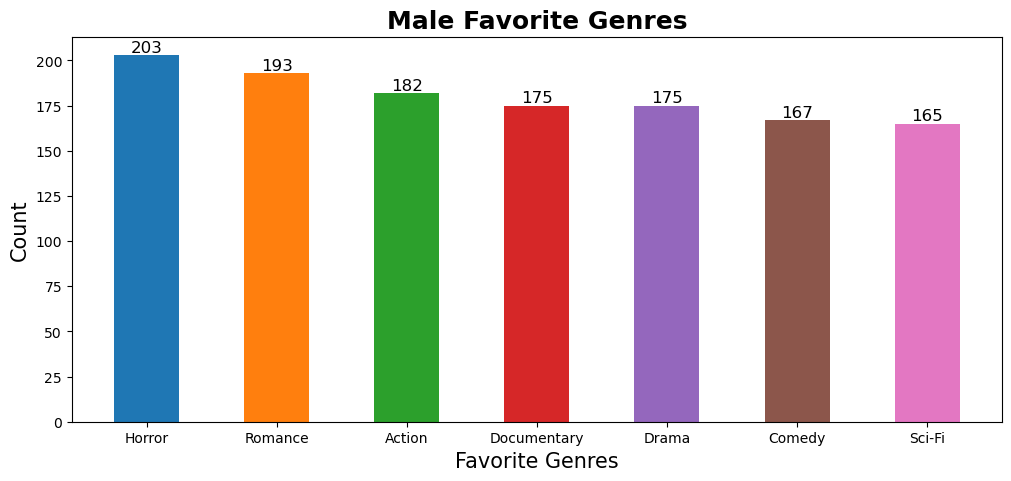

In [69]:
male_genre_count = df.loc[df["Gender"] == "Male", "Favorite Genres"].value_counts()
plt.figure(figsize=(12, 5))
bars = plt.bar(male_genre_count.index, male_genre_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Male Favorite Genres', fontsize=18, fontweight='bold')
plt.show()

# Female Subscribers Genre Analysis

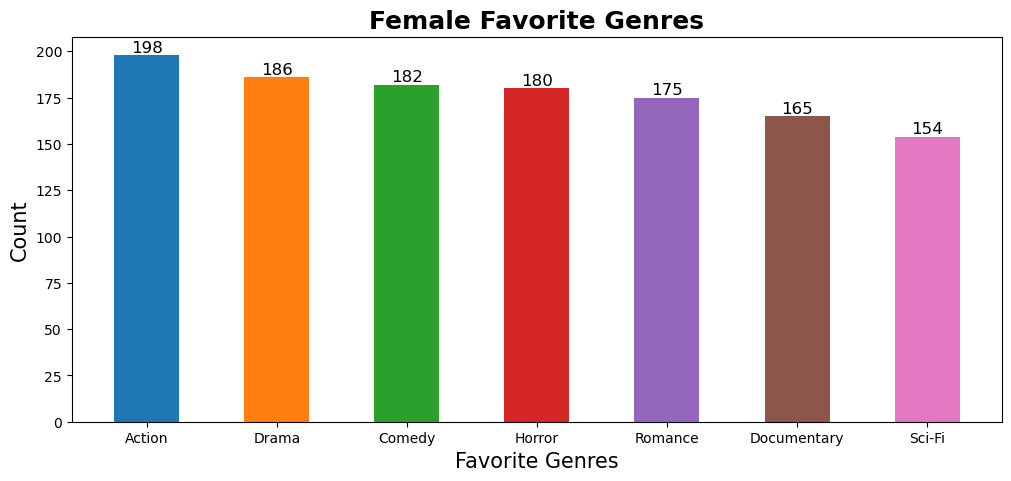

In [70]:
female_genre_count = df.loc[df["Gender"] == "Female", "Favorite Genres"].value_counts()
plt.figure(figsize=(12, 5))
bars = plt.bar(female_genre_count.index, female_genre_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Female Favorite Genres', fontsize=18, fontweight='bold')
plt.show()


# 6. Customer Satisfaction and Support

In [71]:
df["Feedback/Ratings"].value_counts()

Feedback/Ratings
4.3    144
3.1    143
3.8    142
3.9    138
3.5    135
4.1    131
4.5    129
4.9    128
4.6    127
4.7    124
4.8    122
4.4    116
4.2    116
3.6    115
4.0    114
3.2    112
3.7    112
3.3    111
3.4    105
3.0     71
5.0     65
Name: count, dtype: int64

# Top 5 Overall Feedback/Ratings

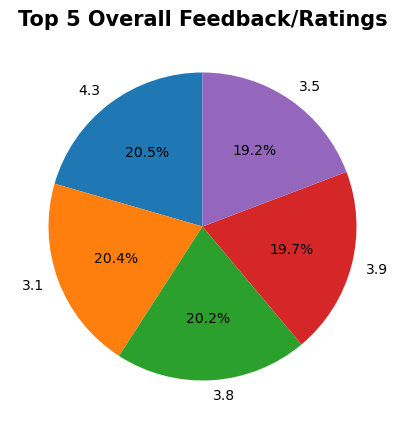

In [72]:
feedback_count = df["Feedback/Ratings"].value_counts().nlargest(5)
plt.figure(figsize=(5, 5))
plt.pie(feedback_count, labels=feedback_count.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Top 5 Overall Feedback/Ratings', fontsize=15, fontweight='bold')
plt.show()


# Top 5 Male Feedback/Ratings

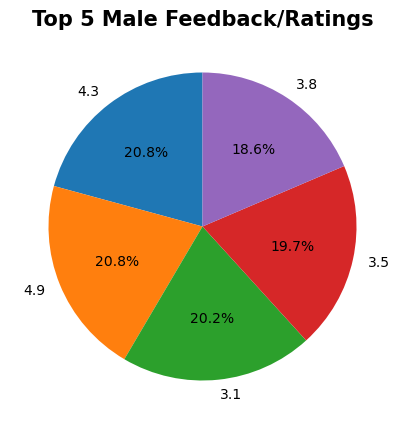

In [73]:
male_feedback_count = df.loc[df["Gender"]=="Male","Feedback/Ratings"].value_counts().nlargest(5)
plt.figure(figsize=(5, 5))
plt.pie(male_feedback_count, labels=male_feedback_count.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Top 5 Male Feedback/Ratings', fontsize=15, fontweight='bold')
plt.show()


# Top 5 Female Feedback/Ratings

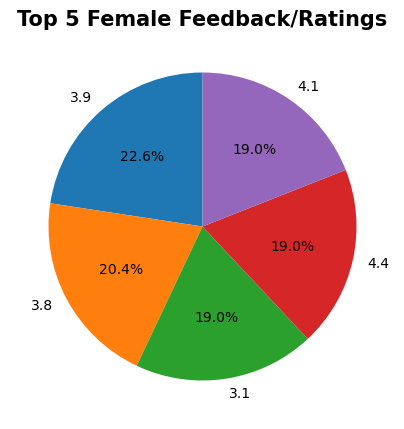

In [74]:
female_feedback_count = df.loc[df["Gender"] == "Female", "Feedback/Ratings"].value_counts().nlargest(5)
plt.figure(figsize=(5, 5))
plt.pie(female_feedback_count, labels=female_feedback_count.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Top 5 Female Feedback/Ratings', fontsize=15, fontweight='bold')
plt.show()


# Support Interaction Patterns

In [75]:
df["Customer Support Interactions"].value_counts()

Customer Support Interactions
1     241
0     238
10    236
5     232
2     231
8     225
4     225
6     222
7     218
9     217
3     215
Name: count, dtype: int64

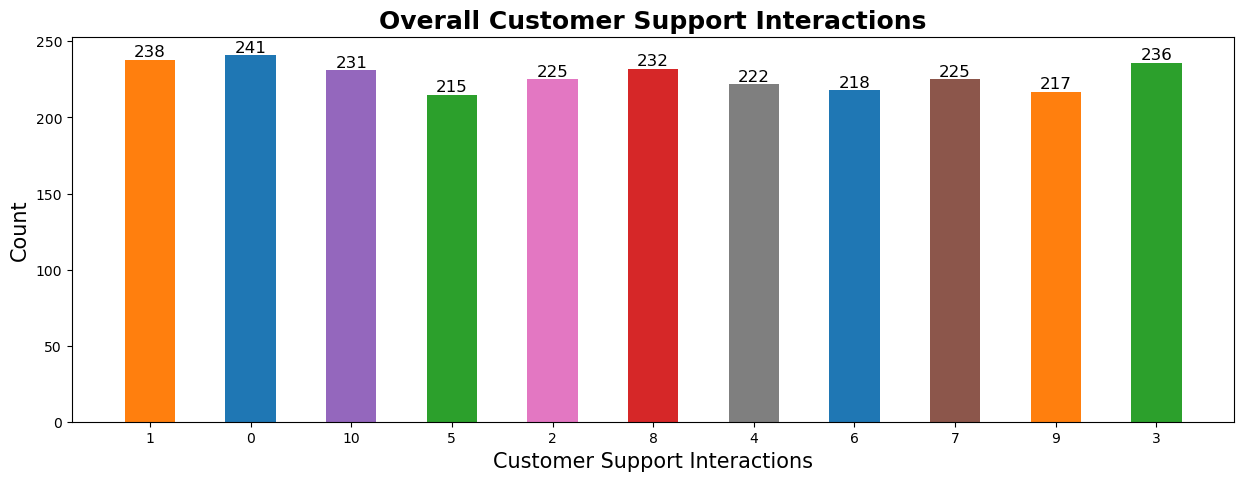

In [76]:
support_interaction_count = df["Customer Support Interactions"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(support_interaction_count.index, support_interaction_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Customer Support Interactions', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Overall Customer Support Interactions', fontsize=18, fontweight='bold')
plt.xticks(ticks=range(len(support_interaction_count.index)), labels=support_interaction_count.index)
plt.show()


# 8. Usage Frequency by Favorite Genres 

# Regular Usage Frequency by Favorite Genres

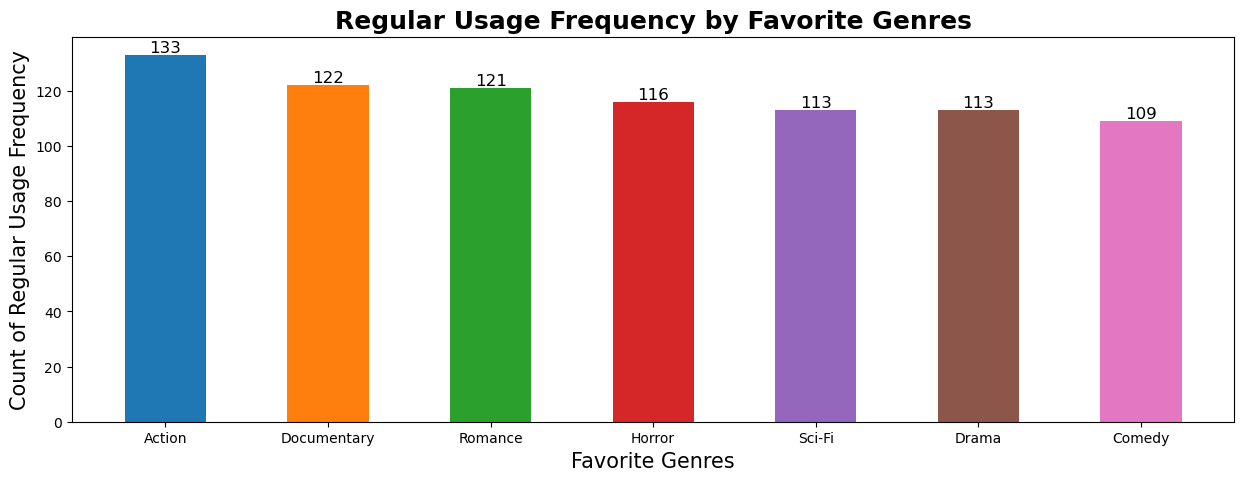

In [77]:
regular_usage_count = df.loc[df["Usage Frequency"] == "Regular","Favorite Genres"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(regular_usage_count.index, regular_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count of Regular Usage Frequency', fontsize=15)
plt.title('Regular Usage Frequency by Favorite Genres', fontsize=18, fontweight='bold')
plt.show()

# Occasional Usage Frequency by Favorite Genres

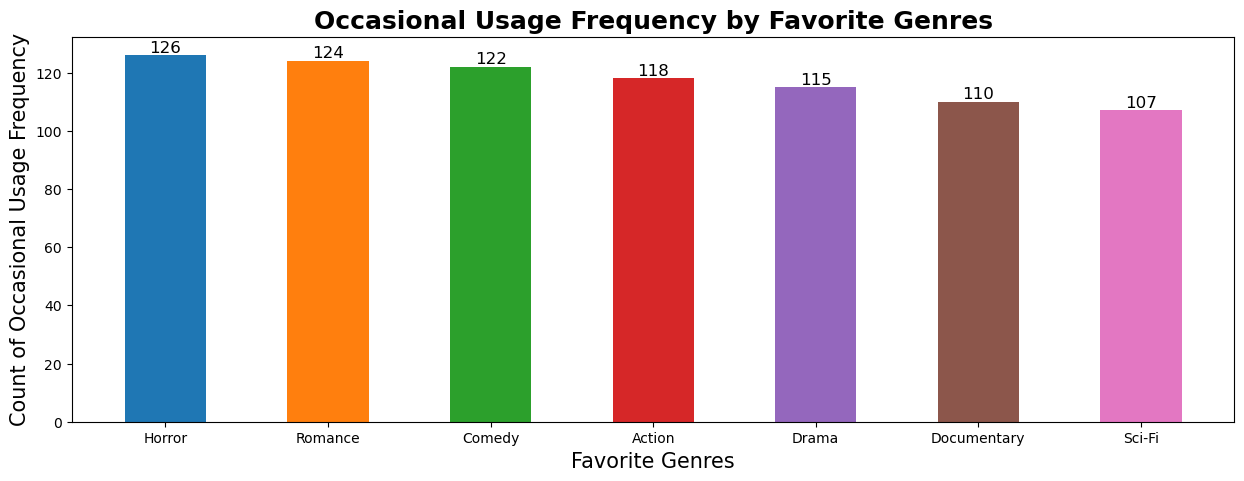

In [78]:
occasional_usage_count = df.loc[df["Usage Frequency"] == "Occasional", "Favorite Genres"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(occasional_usage_count.index, occasional_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count of Occasional Usage Frequency', fontsize=15)
plt.title('Occasional Usage Frequency by Favorite Genres', fontsize=18, fontweight='bold')
plt.show()

# Frequent Usage Frequency by Favorite Genres

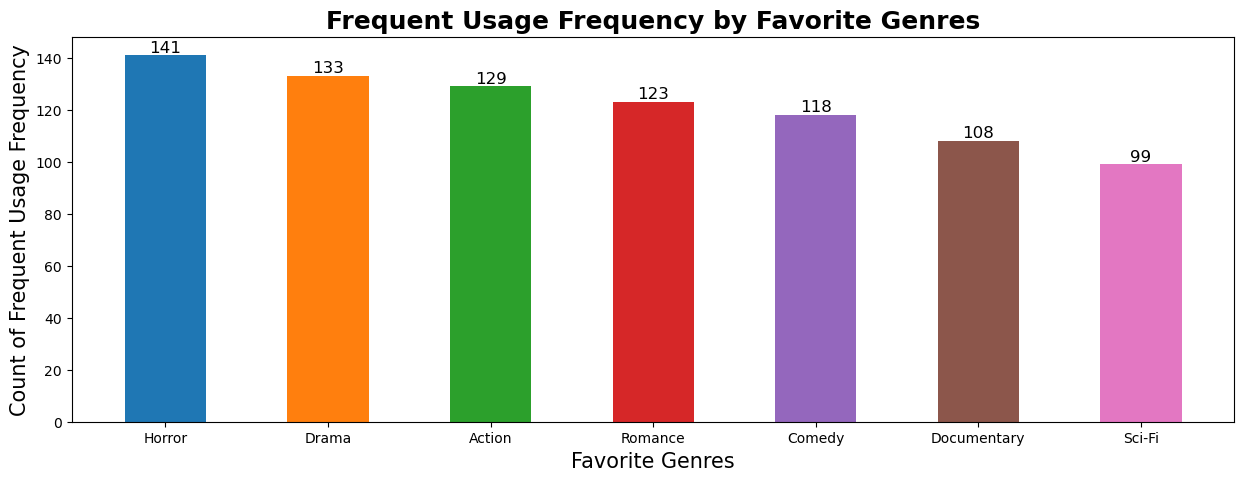

In [79]:
frequent_usage_count = df.loc[df["Usage Frequency"] == "Frequent", "Favorite Genres"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(frequent_usage_count.index, frequent_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count of Frequent Usage Frequency', fontsize=15)
plt.title('Frequent Usage Frequency by Favorite Genres', fontsize=18, fontweight='bold')
plt.show()


# 9. Usage and Behavioral Patterns

# Regular Usage Frequency by Engagement Metrics

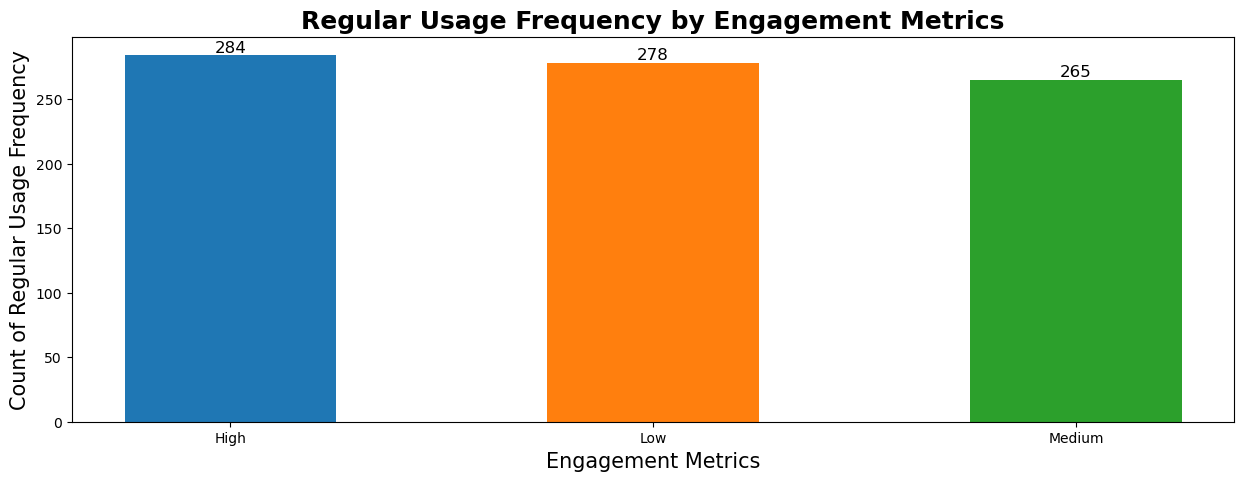

In [80]:
regular_engagement_count = df.loc[df["Usage Frequency"] == "Regular","Engagement Metrics"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(regular_engagement_count.index, regular_engagement_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Engagement Metrics', fontsize=15)
plt.ylabel('Count of Regular Usage Frequency', fontsize=15)
plt.title('Regular Usage Frequency by Engagement Metrics', fontsize=18, fontweight='bold')
plt.show()


# Occasional Usage Frequency by Engagement Metrics

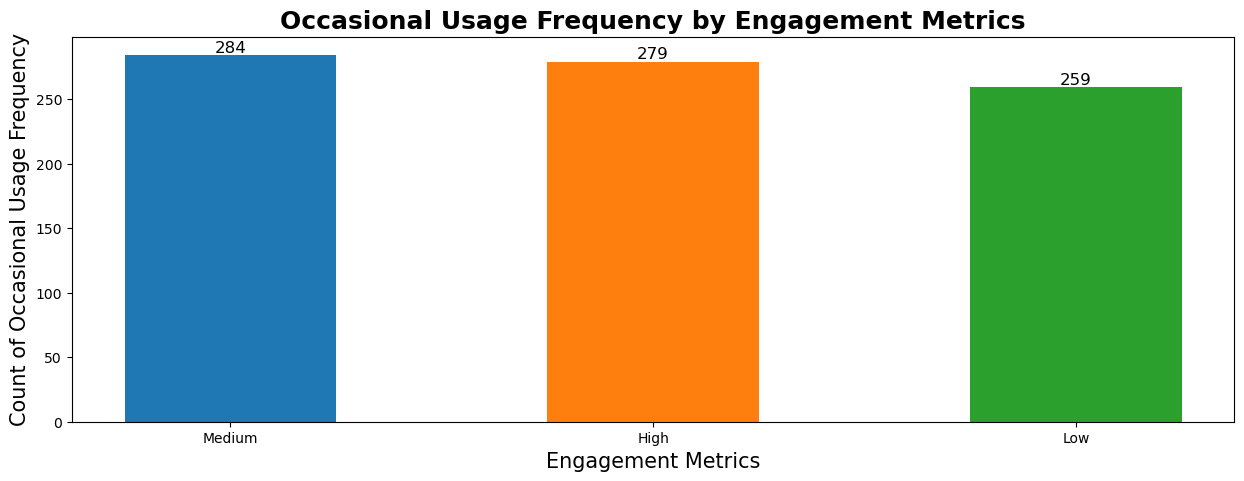

In [81]:
occasional_engagement_count = df.loc[df["Usage Frequency"] == "Occasional","Engagement Metrics"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(occasional_engagement_count.index, occasional_engagement_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Engagement Metrics', fontsize=15)
plt.ylabel('Count of Occasional Usage Frequency', fontsize=15)
plt.title('Occasional Usage Frequency by Engagement Metrics', fontsize=18, fontweight='bold')
plt.show()


# Frequent Usage Frequency by Engagement Metrics

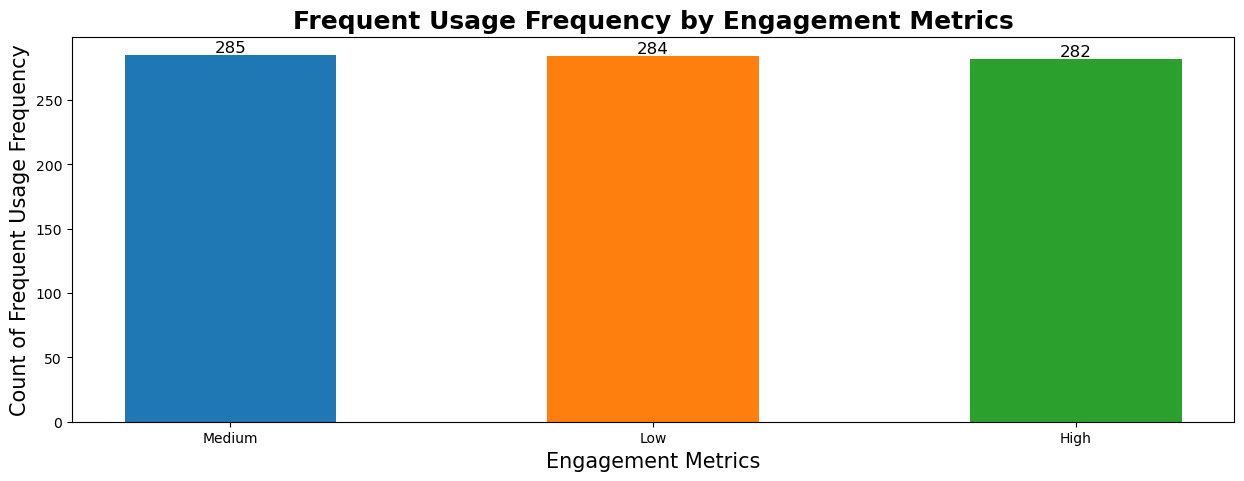

In [82]:
frequent_engagement_count = df.loc[df["Usage Frequency"] == "Frequent","Engagement Metrics"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(frequent_engagement_count.index, frequent_engagement_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Engagement Metrics', fontsize=15)
plt.ylabel('Count of Frequent Usage Frequency', fontsize=15)
plt.title('Frequent Usage Frequency by Engagement Metrics', fontsize=18, fontweight='bold')
plt.show()
